In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [4]:
df.shape

(10841, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
## missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

<Axes: >

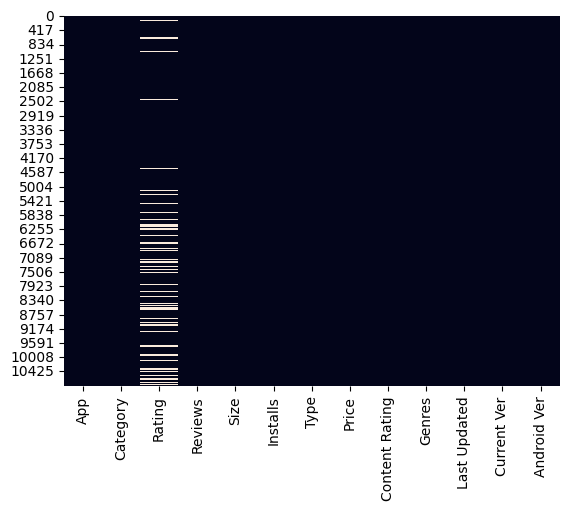

In [8]:
sns.heatmap(df.isnull(), cbar=False)

## Observation
The dataset has missing values

In [9]:
df["Reviews"].value_counts()

Reviews
0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: count, Length: 6002, dtype: int64

In [10]:
df["Reviews"].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

elements are numeric but dtype is string

In [11]:
# df["Reviews"].astype("int")
# i tried this but there was an error written below

some elements of column "Reviews" also contain variables lets check with below code that how many numeric elements are there and compare to the total elements

In [12]:
df["Reviews"].str.isnumeric().sum()

10840

so there are 10840 numeric elements out of 10841, lets check which one is varible with below code

In [13]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


so here in row 10472 and column "Reviews" we contains "3.0M" value lets delete it in another dataset(df_copy) because it will not create any problem with the dataset as it is very small

In [14]:
df_copy=df.copy()

In [15]:
df_copy=df_copy.drop(df_copy.index[10472])

In [16]:
df_copy[~df_copy["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


we can see that from df_copy we have removed the variable(3.0M) from the "Reviews" columns

In [17]:
df_copy["Reviews"]=df_copy["Reviews"].astype(int)

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


here we have converted "Reviews" column from object type to int type. now lets look at "Size" column.

In [19]:
df_copy["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [20]:
df_copy["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

here we can see there some different variables with the numeric values("M","k"), lets convert "M" with '000' and "k" with ''.

In [21]:
df_copy["Size"]=df_copy["Size"].str.replace("M", "000")
df_copy["Size"]=df_copy["Size"].str.replace("k", "")

In [22]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

now there is another problem in this "Size" column and that is we have given 'Varies with device' lets rplace it with null because we dont know the value of this element.

In [23]:
df_copy["Size"]=df_copy["Size"].replace('Varies with device', np.nan) ## we will not use .str here.
df_copy["Size"]=df_copy["Size"].astype(float)

In [24]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


now here we can see "Size" column is also coverted to float type. lets  move to "Installs" column

In [26]:
df_copy["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [27]:
df_copy["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

lets check "Price" column too

In [28]:
df_copy["Price"].value_counts()

Price
0         10040
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [29]:
df_copy["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

here in "Price" and "Installs" column we can see "+", "$" and "," are there so lets remove them with below code.

In [30]:
chars_to_remove=["+",",","$"]
cols_to_clean=["Installs","Price"]
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,"")

In [31]:
df_copy["Price"].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [32]:
df_copy["Installs"].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

we have sucessfully removed ",", "$" and "+" signs from "Price" and "Installs" columns. lets convert "Price" to float type and "Installs" to int type.

In [33]:
df_copy["Price"]=df_copy["Price"].astype(float)
df_copy["Installs"]=df_copy["Installs"].astype(int)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.2+ MB


now look at "last Update" column

In [34]:
df_copy["Last Updated"]

0         January 7, 2018
1        January 15, 2018
2          August 1, 2018
3            June 8, 2018
4           June 20, 2018
               ...       
10836       July 25, 2017
10837        July 6, 2018
10838    January 20, 2017
10839    January 19, 2015
10840       July 25, 2018
Name: Last Updated, Length: 10840, dtype: object

lets convert this to "date-time" format with below code and take "date", "month" and "year" saperately.

In [35]:
df_copy["Last Updated"]=pd.to_datetime(df_copy["Last Updated"])
df_copy["Day"]=df_copy["Last Updated"].dt.day
df_copy["Month"]=df_copy["Last Updated"].dt.month
df_copy["Year"]=df_copy["Last Updated"].dt.year

In [36]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int32         
 14  Month           10840 non-null  int32         
 15  Year   

here "Last Updated" column coverted to "datetime" type and date, month and year we have taken saperately.
now lets look "Content Rating" column.

In [37]:
df_copy["Content Rating"].value_counts()

Content Rating
Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

In [38]:
df_copy["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Text(0.5, 1.0, 'Content rating with their counts')

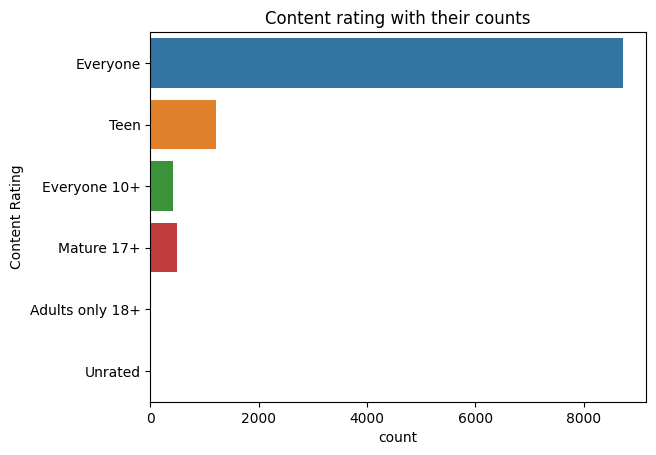

In [39]:
sns.countplot(y = "Content Rating", data = df)
plt.title("Content rating with their counts")

Here with this count-plot we can observe that "Everyone" Content Rating contains highest count (more than 8000) followed by "Teen" and "Mature 17+".

Text(0.5, 1.0, 'The content rating & rating')

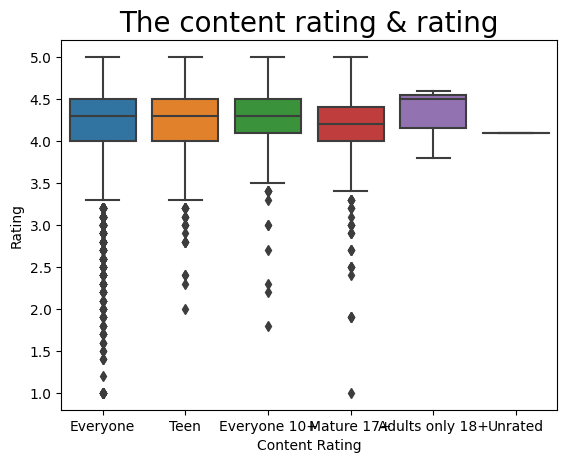

In [40]:
sns.boxplot(x = "Content Rating", y = "Rating", data = df)
plt.title("The content rating & rating", size=20)

Also "Everyone" content rating contains more numbers of outliers.

we can do ohe(one hot encoding) on these features.

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
# Create an instance of One-hot-encoder 
ohe=OneHotEncoder()

# ohe.fit_transform(df[["Content Rating"]])

# Passing encoded columns 
ohe_data = pd.DataFrame(ohe.fit_transform( 
    df_copy[["Content Rating"]]).toarray(), columns=ohe.get_feature_names_out())

# Merge with main 
df_copy = df_copy.join(ohe_data) 
# df_copy=pd.concat([df_copy,ohe_data],axis=1)
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Day,Month,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,...,4.0.3 and up,7,1,2018,0.0,1.0,0.0,0.0,0.0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,15,1,2018,0.0,1.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,4.0.3 and up,1,8,2018,0.0,1.0,0.0,0.0,0.0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,...,4.2 and up,8,6,2018,0.0,0.0,0.0,0.0,1.0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,4.4 and up,20,6,2018,0.0,1.0,0.0,0.0,0.0,0.0


here we have made dummy features using OHE which will help us in building ML model. now lets check more columns.

In [43]:
df_copy["Category"].value_counts()

Category
FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

In [44]:
df_copy["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Text(0.5, 1.0, 'The number of categories')

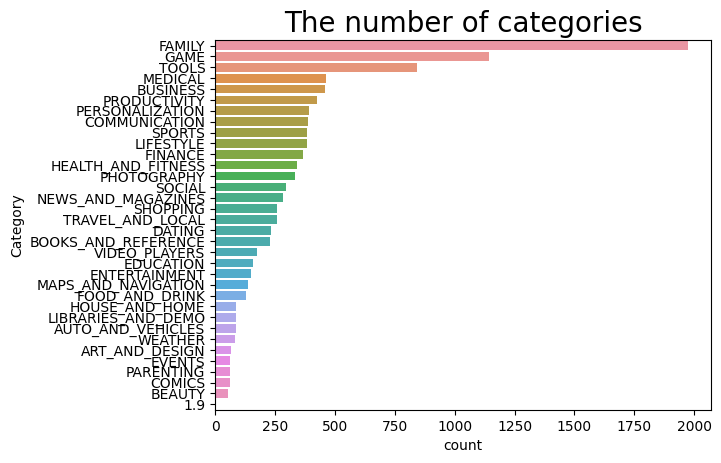

In [46]:
cat_num = df["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = df)
plt.title("The number of categories", size=20)

Here with this bar-plot we can observe that "Family" Category have highest counts(around 2000) followed by "Game" and "Tools"

In [47]:
df_copy["App"].value_counts()

App
ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: count, Length: 9659, dtype: int64

In [48]:
df_copy["App"].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [49]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated'],
      dtype='object')

In [50]:
df_copy["Genres"].value_counts()

Genres
Tools                                842
Entertainment                        623
Education                            549
Medical                              463
Business                             460
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64

In [51]:
df_copy["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

here columns: "App", "Genres" and "Category" contains many categories which are categorical so we have to apply "Target guided Ordinal Encoding" or "Lebel and Ordinal Encoding" to make them contineous.

In [52]:
# calculate the mean installs for each "App"
mean_app_installs=df_copy.groupby("App")["Installs"].mean().to_dict()
# replace each "App" with its mean "installs"
df_copy["App encoded"]=df_copy["App"].map(mean_app_installs)

# calculate the mean installs for each "Category"
mean_category_installs=df_copy.groupby("Installs")["Installs"].mean().to_dict()
# replace each "Category" with its mean "installs"
df_copy["Installs encoded"]=df_copy["Installs"].map(mean_category_installs)

# calculate the mean installs for each "Genres" 
mean_genres_installs=df_copy.groupby("Genres")["Installs"].mean().to_dict()
# replace each "Genres" with its mean "installs"
df_copy["Genres encoded"]=df_copy["Genres"].map(mean_genres_installs)

df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,App encoded,Installs encoded,Genres encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,10000.0,10000.0,2.112553e+06
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,500000.0,500000.0,5.000000e+05
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,5000000.0,5000000.0,2.112553e+06
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,...,2018,0.0,0.0,0.0,0.0,1.0,0.0,50000000.0,50000000.0,2.112553e+06
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,100000.0,100000.0,3.157143e+05


In [53]:
df_copy["Current Ver"].value_counts()

Current Ver
Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
5.44.1                   1
7.16.8                   1
04.08.00                 1
2.10.06                  1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64

In [54]:
df_copy["Current Ver"].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [55]:
# Fillna, the "nan" to aganist mode value.
df_copy["Current Ver"] = df_copy["Current Ver"].fillna(df_copy["Current Ver"].mode()[0])

In [56]:
# Replace, the the value of "Varies with device" from "Current Ver" to mode value
df_copy['Current Ver'] = df_copy['Current Ver'].str.replace("Varies with device", df_copy['Current Ver'].mode()[0]) 

In [57]:
df_cv=df_copy["Current Ver"]
cv_list=df_cv.values.tolist()
cv_list

['1.0.0',
 '2.0.0',
 '1.2.4',
 'Varies with device',
 '1.1',
 '1.0',
 '1.1',
 '6.1.61.1',
 '2.9.2',
 '2.8',
 '1.0.4',
 '1.0.15',
 '3.8',
 '1.0.4',
 '1.2.3',
 'Varies with device',
 '3.1',
 '1.0',
 '2.2.5',
 '5.5.4',
 '4.0',
 '1.1',
 '2.2.6.2',
 '1.0.0',
 '1.1.3',
 '1.5',
 '1.0.8',
 '1.03',
 '6.0',
 '1.0',
 '6.7.12.2018',
 '1.2',
 '2.20',
 '1.1.0',
 '1.6',
 '2.1',
 '1.0.9',
 'Varies with device',
 '1.3',
 '1',
 '2.0.1',
 '1.0',
 'Varies with device',
 '1.46',
 '1.0.0',
 '1.6.1',
 '1.6',
 '2.0.0',
 '1.0',
 '1.0',
 '11.0',
 '3.0',
 'Varies with device',
 '3.0',
 '4.0',
 '1.7.1',
 '2.5.1',
 '3.0',
 '1.0.1',
 '2.493',
 '1.9.1',
 '1.7',
 '2.20 Build 02',
 '1.37',
 '1.7',
 '0.2.1',
 '1.0',
 'Varies with device',
 'Varies with device',
 '4.47.3',
 '1.9.7',
 '2.2.21',
 'Varies with device',
 '2.9',
 '1.79',
 '1.3',
 '2.3.5.1',
 '1.6',
 '1.6',
 '8.31',
 '1.1.5.0',
 '10.0.2',
 '1.10.3',
 '1.0',
 '3.20.1',
 'Varies with device',
 '1.0.3',
 '1.4',
 'Varies with device',
 '4.6.5',
 '2.8.2',
 '4.0.3'

In [58]:
cv_list0=[]
for i in cv_list:
    i=i[:3]
    cv_list0.append(i)

In [59]:
df_copy["Current Ver"]=pd.DataFrame(cv_list0)

# Fillna, the "nan" to aganist mode value.
df_copy["Current Ver"] = df_copy["Current Ver"].fillna(df_copy["Current Ver"].mode()[0])

In [60]:
df_copy[df_copy["Current Ver"].str.replace(".", "").str.isnumeric()]["Current Ver"].unique()

array(['1.0', '2.0', '1.2', '1.1', '6.1', '2.9', '2.8', '3.8', '3.1',
       '2.2', '5.5', '4.0', '1.5', '6.0', '6.7', '1.6', '2.1', '1.3', '1',
       '1.4', '11.', '3.0', '1.7', '2.5', '2.4', '1.9', '0.2', '4.4',
       '2.3', '8.3', '10.', '3.2', '4.6', '5.4', '8.0', '3.3', '18.',
       '9.1', '15.', '5.0', '9.0', '14.', '7.0', '3.9', '3.4', '9.7',
       '4.9', '5.2', '3.5', '7.3', '5.1', '4.1', '99.', '12.', '0.9',
       '6.4', '3.7', '2.6', '4.3', '6.3', '4.7', '4.2', '1.8', '37.',
       '9.8', '24.', '47.', '69.', '7.5', '9.9', '42.', '0.1', '7.7',
       '7.2', '6.5', '5.6', '4.5', '5.8', '196', '8.1', '201', '6.6',
       '4.8', '8.7', '0.0', '3.6', '5.3', '8.2', '1.', '2', '20.', '10',
       '5.7', '13.', '8.5', '01.', '43', '16.', '8.4', '6.8', '6.2',
       '2.7', '5.9', '7.8', '7.1', '7.9', '112', '37', '8.8', '7.4',
       '9.6', '220', '858', '02.', '9.4', '319', '542', '0.7', '0.5',
       '19.', '79.', '108', '8', '57.', '60', '149', '378', '28.', '7.6',
       '7'

In [61]:
df_copy[~df_copy["Current Ver"].str.replace(".", "").str.isnumeric()]["Current Ver"].unique()

array(['Var', 'R6.', 'v1.', 'Can', 'p5.', 'Pub', 'v3.', 'Ver', '1_3',
       'PN.', 'Ini', 'T4.', 'v5.', 'MyM', 'v8.', 'v7.', 'v15', 'Fre',
       'Nat', 'ver', 'a.2', 'v8[', '1,0', 'v20', 'H7S', 'v2', 'acr',
       'v67', 'air', '11;', 'v4.', 'cli', 'v2.', 'clo', 'new', 'Z (',
       'Cow', '3_1', 'Fin', 'Arr', 'BL ', 'Roc', 'V1.', 'V2.', 'no_',
       'opc', 'v6.', '01e', 'fcb', 'The', 'CL ', 'Bow', 'App', 'Cop',
       'Gra', 'Rel', 'Y4W', 'Sol', 'KM', 'iu4', 'IND', 'And', 'Tra',
       'Glu', 'v3', 'DH-', 'HTT', '21 ', 'DPS', '15|', 'di-', 'r2.',
       'pb1', 'R1.', 'Hum', 'eri', 'Bui', 'Pai', 'Fen', 'Blu', 'Pro',
       'V1-', 'MON', 'F2i', 'V4.', 'FH ', '3rd'], dtype=object)

In [62]:
#cv_list3=[]
#con=[['0'],['1'],['2'],['3'],['4'],['5'],['6'],['7'],['8'],['9'],['0'],['.']]
#for n in cv_list2:
 #   for m in range(len(con)):
  #      if n[0] != con[m]:
   #         cv_list3.append(n)
#list3df["b"]=pd.DataFrame(cv_list3)
#list3df["b"].unique()

In [63]:
df_copy["Android Ver"].value_counts()

Android Ver
4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [64]:
df_copy["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

"Android Ver" and "Current Ver" cloumns contains categories which can be converted to contineous.

In [65]:
# Replace, the the value of "Varies with device" from "Android Ver" to mode value
df_copy['Android Ver'] = df_copy['Android Ver'].str.replace("Varies with device", df_copy['Android Ver'].mode()[0]) 

In [66]:
# Replace, the value "W and up" from "Android Ver" to empty string
df_copy["Android Ver"] = df_copy["Android Ver"].str.replace("W and up", "")
# Replace, the value " and up" from "android_version" to empty string
df_copy['Android Ver'] = df_copy['Android Ver'].str.replace(' and up', '')

In [67]:
df_copy["Android Ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '2.2',
       '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '4.0.3 - 7.1.1', '2.0', '3.2', '7.1', '7.0 - 7.1.1', '8.0',
       '5.0 - 8.0', '3.1', '2.0.1', '4.1 - 7.1.1', nan, '5.0 - 6.0',
       '1.0', '2.2 - 7.1.1', '5.0 - 7.1.1'], dtype=object)

In [68]:
# Fillna, the "nan" to aganist mode value.
df_copy["Android Ver"] = df_copy["Android Ver"].fillna(df_copy["Android Ver"].mode()[0])

In [69]:
# Replace, the values [" - 7.1.1", " - 6.0", " - 8.0"] from "android_version" column
df_copy["Android Ver"] = df_copy["Android Ver"].str.replace(" - 7.1.1", "")
df_copy["Android Ver"] = df_copy["Android Ver"].str.replace(" - 6.0", "")
df_copy["Android Ver"] = df_copy["Android Ver"].str.replace(" - 8.0", "")

In [70]:
# Replace, the values with two decimal points from "android_version" column
df_copy["Android Ver"] = df_copy['Android Ver'].str.replace("4.0.3", "4.0")
df_copy["Android Ver"] = df_copy['Android Ver'].str.replace("2.3.3", "2.3")
df_copy["Android Ver"] = df_copy['Android Ver'].str.replace("2.0.1", "2.0")

In [71]:
# Again, show unique values in "android_version" column
df_copy['Android Ver'].unique()

array(['4.0', '4.2', '4.4', '2.3', '3.0', '4.1', '2.2', '5.0', '6.0',
       '1.6', '1.5', '2.1', '7.0', '5.1', '4.3', '2.0', '3.2', '7.1',
       '8.0', '3.1', '1.0'], dtype=object)

In [72]:
# Convert, the dtype of "android_version" column
df_copy["Android Ver"] = df_copy["Android Ver"].astype(float)

here we have sucessfully filter the "Android Ver" column.

In [73]:
df_copy["Type"].value_counts()

Type
Free    10039
Paid      800
Name: count, dtype: int64

Text(0.5, 1.0, 'Free & Paid')

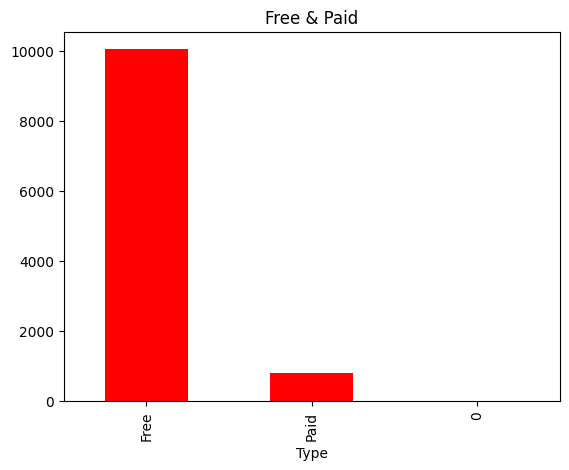

In [74]:
df["Type"].value_counts().plot(kind="bar", color ="red")
plt.title("Free & Paid")

With this bar-plot we can conclude that there are large number of "Free" type then "Paid" type.

Text(0.5, 1.0, 'Content rating with their counts')

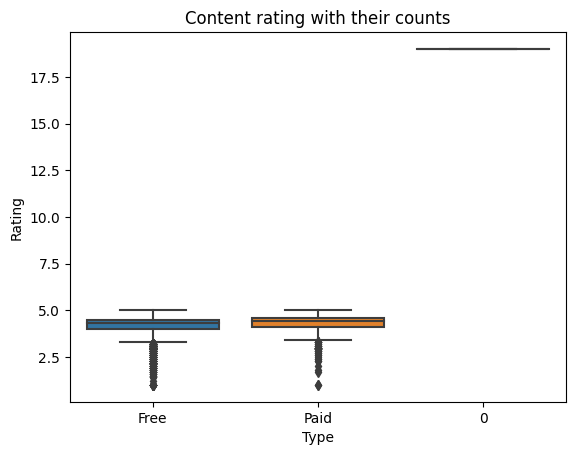

In [75]:
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("Content rating with their counts")

In [76]:
df_copy['Type'].replace(['Free', 'Paid'],
                        [0, 1], inplace=True)
df_copy["Type"] = df_copy["Type"].fillna(df_copy["Type"].mode()[0])
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,App encoded,Installs encoded,Genres encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,0.0,Everyone,Art & Design,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,10000.0,10000.0,2.112553e+06
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,0.0,Everyone,Art & Design;Pretend Play,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,500000.0,500000.0,5.000000e+05
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,0.0,Everyone,Art & Design,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,5000000.0,5000000.0,2.112553e+06
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,0.0,Teen,Art & Design,...,2018,0.0,0.0,0.0,0.0,1.0,0.0,50000000.0,50000000.0,2.112553e+06
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,0.0,Everyone,Art & Design;Creativity,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,100000.0,100000.0,3.157143e+05


"Type" column have only two categories so we can replace them with 0 and 1.

In [77]:
df_copy.duplicated().sum()

482

we have 483 duplicate columns, let's remove them.

In [78]:
df_copy = df_copy.drop_duplicates()
df_copy = df_copy.reset_index(drop=True)

In [79]:
df_copy.duplicated().sum()

0

now there are 0 duplicates. earlier we saw column "Rating" and "Size" contain a large amount null values, let's remove them.

In [80]:
df_copy['Rating'] = df_copy['Rating'].fillna(round(df_copy['Rating'].mean(), 1))

Text(0.5, 1.0, 'Histogram with the kde for the rating column ')

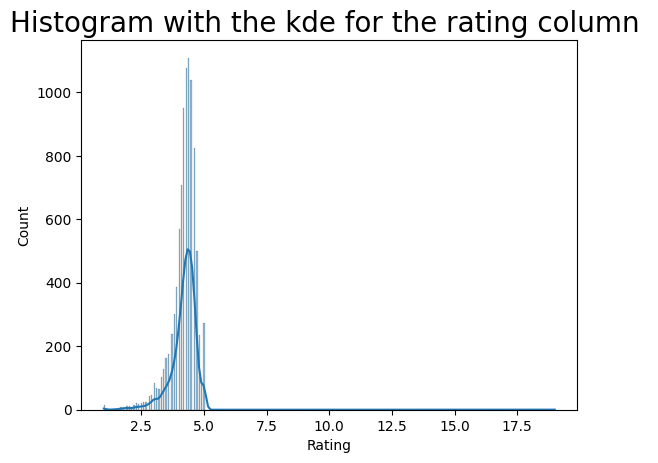

In [81]:
sns.histplot(df["Rating"], kde = True)
plt.title("Histogram with the kde for the rating column ", size=20,)

In [82]:
df_copy['Size'] = df_copy['Size'].fillna(round(df_copy['Size'].mean(), 1))

here with the help of above code we have replace all the null values with that column's mean value.

In [83]:
df_copy.isnull().sum()

App                               0
Category                          0
Rating                            0
Reviews                           0
Size                              0
Installs                          0
Type                              0
Price                             0
Content Rating                    0
Genres                            0
Last Updated                      0
Current Ver                       0
Android Ver                       0
Day                               0
Month                             0
Year                              0
Content Rating_Adults only 18+    1
Content Rating_Everyone           1
Content Rating_Everyone 10+       1
Content Rating_Mature 17+         1
Content Rating_Teen               1
Content Rating_Unrated            1
App encoded                       0
Installs encoded                  0
Genres encoded                    0
dtype: int64

In [84]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,App encoded,Installs encoded,Genres encoded
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,0.0,0.0,Everyone,Art & Design,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,10000.0,10000.0,2.112553e+06
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,0.0,0.0,Everyone,Art & Design;Pretend Play,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,500000.0,500000.0,5.000000e+05
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,0.0,0.0,Everyone,Art & Design,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,5000000.0,5000000.0,2.112553e+06
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0.0,0.0,Teen,Art & Design,...,2018,0.0,0.0,0.0,0.0,1.0,0.0,50000000.0,50000000.0,2.112553e+06
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,0.0,0.0,Everyone,Art & Design;Creativity,...,2018,0.0,1.0,0.0,0.0,0.0,0.0,100000.0,100000.0,3.157143e+05


In [85]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   App                             10358 non-null  object        
 1   Category                        10358 non-null  object        
 2   Rating                          10358 non-null  float64       
 3   Reviews                         10358 non-null  int64         
 4   Size                            10358 non-null  float64       
 5   Installs                        10358 non-null  int64         
 6   Type                            10358 non-null  float64       
 7   Price                           10358 non-null  float64       
 8   Content Rating                  10358 non-null  object        
 9   Genres                          10358 non-null  object        
 10  Last Updated                    10358 non-null  datetime64[ns]
 11  Cu

In [86]:
# "Content Rating" columns contains 1 nan value in all five columns let's drop this raw.
df_copy[df_copy["Content Rating_Adults only 18+"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Year,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,App encoded,Installs encoded,Genres encoded
10357,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19000.0,10000000,0.0,0.0,Everyone,Lifestyle,...,2018,NaN,NaN,NaN,NaN,NaN,NaN,10000000.0,10000000.0,1.384891e+06


In [87]:
df_copy=df_copy.drop(df_copy.index[10357])

In [88]:
df_copy.isnull().sum()

App                               0
Category                          0
Rating                            0
Reviews                           0
Size                              0
Installs                          0
Type                              0
Price                             0
Content Rating                    0
Genres                            0
Last Updated                      0
Current Ver                       0
Android Ver                       0
Day                               0
Month                             0
Year                              0
Content Rating_Adults only 18+    0
Content Rating_Everyone           0
Content Rating_Everyone 10+       0
Content Rating_Mature 17+         0
Content Rating_Teen               0
Content Rating_Unrated            0
App encoded                       0
Installs encoded                  0
Genres encoded                    0
dtype: int64

In [89]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Day', 'Month', 'Year', 'Content Rating_Adults only 18+',
       'Content Rating_Everyone', 'Content Rating_Everyone 10+',
       'Content Rating_Mature 17+', 'Content Rating_Teen',
       'Content Rating_Unrated', 'App encoded', 'Installs encoded',
       'Genres encoded'],
      dtype='object')